<a href="https://colab.research.google.com/github/GTuritto/Demos4Course/blob/main/Demo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pyautogen matplotlib yfinance mistralai openai dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 4.6 MB/s eta 0:00:00


Esta Libreria la necesitamos para usar los Secrets de Google Colab

In [3]:
from google.colab import userdata

In [6]:
from IPython.display import Image, display
import os
import autogen
from autogen.coding import LocalCommandLineCodeExecutor

## Configuramos la conexion al API del LLM

In [7]:
# API Configuracion para OpenAI
# apiConfig = [{
#        "model": "gpt-4o-mini",
#        "max_tokens": 500,
#        "api_key": userdata.get('OPENAI_API_KEY')
#    }]


# Configuración de la API para Mistral - preferida por su costo y rendimiento.
api_config = [{
        "model": "mistral-large-latest",
        "max_tokens": 500,  # Límite reducido de tokens para respuestas más concisas
        "api_key": userdata.get('MISTRAL_API_KEY'),
        "api_type": "mistral"
    }]

# Configuración para el LLM, incluyendo lógica de reintentos y semilla de caché para consistencia
llm_config = {
    "config_list": api_config,
    "cache_seed": 42,  # Semilla de caché para un comportamiento consistente
    "retry_on_rate_limit": True,  # Reintentar si se alcanza el límite de la API
    "retry_on_timeout": True,     # Reintentar si hay un tiempo de espera
    "max_retries": 5,             # Número máximo de reintentos
    "retry_delay": 0.3,           # Retraso más corto para reintentos más rápidos
}

## Creemos el Assitente que hara el trabajo

In [8]:
# Crear el AssistantAgent llamado "Asistente"
asistente = autogen.AssistantAgent(
    name="Asistente",
    llm_config=llm_config,
    system_message="Sé conciso, informativo, y trata de reducir las preguntas de seguimiento."
)

## Creemos el Assitente que Servira de Interfaz con el Usuario

In [9]:

# Crear el agente que actúa como Proxy del Usuario
proxy_usuario = autogen.UserProxyAgent(
    name="Usuario - Proxy",
    human_input_mode="NEVER",  # No se requiere retroalimentación del usuario. Opciones: "ALWAYS", "TERMINATE", "NEVER"
    max_consecutive_auto_reply=5,  # Reducido el número máximo de intercambios a 5
    is_termination_msg=lambda x: x.get("contenido", "").rstrip().endswith("TERMINATE") or "tarea completada" in x.get("contenido", ""),  # Termina cuando se completa la tarea
    code_execution_config={
        "executor": LocalCommandLineCodeExecutor(work_dir="contenido"),  # Donde se ejecuta el código generado
        "last_n_messages": 2,  # Solo considera los últimos 2 mensajes para reducir el contexto y uso de tokens
    },
)



Solicita que quieres hacer e inicia la interacion entre el Agente que representa al Usuario y el Agente de trabajo

In [17]:
# Entrada dinámica de solicitud del usuario para cualquier tarea o gráfico
task_request = input("Por favor, ingrese la tarea que desea que el asistente complete: ")

# Inicia una conversación para solicitar cualquier tarea de forma dinámica
proxy_usuario.initiate_chat(
    recipient=asistente,
    message=task_request
)

Por favor, ingrese la tarea que desea que el asistente complete: Genera la grafica de Precios YTD comparando BitCoin, y Ethereum en USD. Salva la grafica en un archivo output.png
Usuario - Proxy (to Asistente):

Genera la grafica de Precios YTD comparando BitCoin, y Ethereum en USD. Salva la grafica en un archivo output.png

--------------------------------------------------------------------------------
Asistente (to Usuario - Proxy):

Para generar una gráfica de precios YTD (Year-To-Date) comparando Bitcoin y Ethereum en USD y guardarla en un archivo llamado `output.png`, puedes seguir estos pasos utilizando Python y las bibliotecas `pandas`, `yfinance` y `matplotlib`.

1. Instala las bibliotecas necesarias si no las tienes:
   ```bash
   pip install pandas yfinance matplotlib
   ```

2. Utiliza el siguiente código para generar la gráfica:

   ```python
   import pandas as pd
   import yfinance as yf
   import matplotlib.pyplot as plt

   # Descargar datos YTD de Bitcoin y Ethereum
 

ChatResult(chat_id=None, chat_history=[{'content': 'Genera la grafica de Precios YTD comparando BitCoin, y Ethereum en USD. Salva la grafica en un archivo output.png', 'role': 'assistant', 'name': 'Usuario - Proxy'}, {'content': "Para generar una gráfica de precios YTD (Year-To-Date) comparando Bitcoin y Ethereum en USD y guardarla en un archivo llamado `output.png`, puedes seguir estos pasos utilizando Python y las bibliotecas `pandas`, `yfinance` y `matplotlib`.\n\n1. Instala las bibliotecas necesarias si no las tienes:\n   ```bash\n   pip install pandas yfinance matplotlib\n   ```\n\n2. Utiliza el siguiente código para generar la gráfica:\n\n   ```python\n   import pandas as pd\n   import yfinance as yf\n   import matplotlib.pyplot as plt\n\n   # Descargar datos YTD de Bitcoin y Ethereum\n   bitcoin = yf.download('BTC-USD', start='2023-01-01')['Close']\n   ethereum = yf.download('ETH-USD', start='2023-01-01')['Close']\n\n   # Crear un DataFrame con los datos\n   df = pd.DataFrame({'

### Resultados de la operacion solicitada

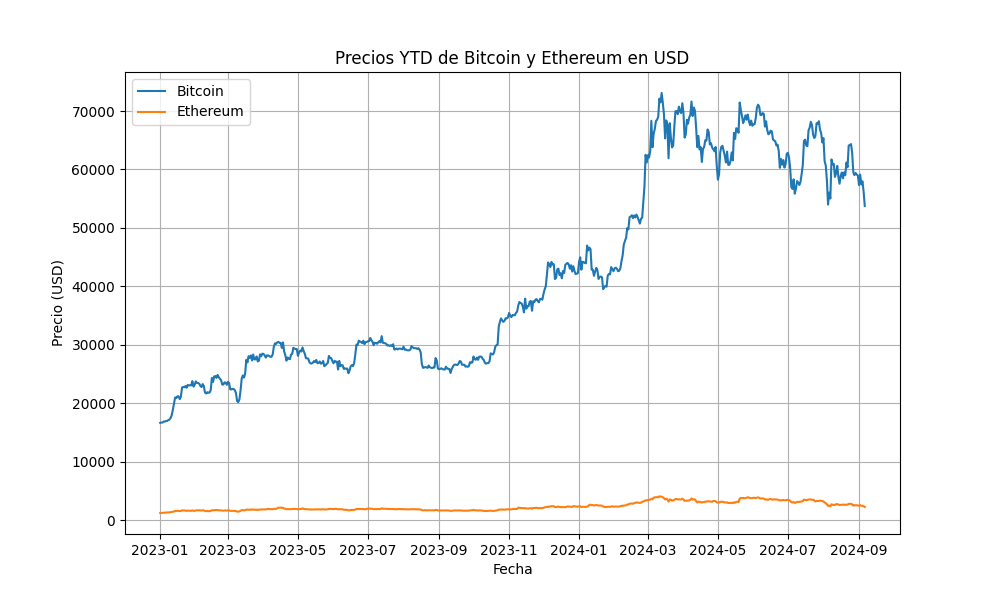

In [18]:
# Intenta mostrar cualquier imagen o resultado generado, si aplica
output_file = "contenido/output.png"  # Puedes definir cualquier archivo de salida esperado
try:
    image = Image(filename=output_file)
    display(image)
except FileNotFoundError:
    print(f"No se encontró la salida en {output_file}. Es posible que la tarea solicitada no produzca un resultado visual.")
